In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16

# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16

plt.rcParams['figure.dpi'] = 300


# Set global figure size (width, height) in inches
plt.rcParams['figure.figsize'] = (12, 8)

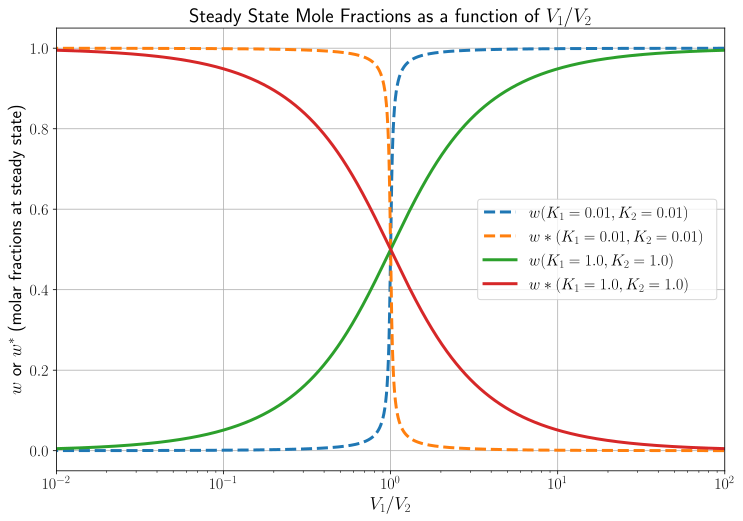

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def plot_steady_state_mole_fractions(Pairs_of_K1_K2): # Pairs_of_K1_K2 is a list of tuples of K1 and K2
    W_range = np.linspace(0, 1, 10000)
    linestyles = ['-', '--'] # Different linestyles for each pair of K1 and K2 values
    for i, (K1, K2) in enumerate(Pairs_of_K1_K2, 1):
        V1 = W_range * (1 - W_range + K1) # defined in goldbeter_koshland paper equation 8
        V2 = (1 - W_range) * (W_range + K2) # defined in goldbeter_koshland paper equation 8

        with np.errstate(divide='ignore'): # ignore divide by zero warning
            V_ratio = V1 / V2 # defined in goldbeter_koshland paper equation 8

            linestyle = linestyles[i % 2]

        plt.plot(V_ratio, W_range, label=f"$w (K_1={K1}, K_2={K2})$", linestyle=linestyle, linewidth=3)
        plt.plot(V_ratio, 1 - W_range, label=f"$w* (K_1={K1}, K_2={K2})$", linestyle=linestyle, linewidth=3)

    plt.xscale("log")
    plt.xlabel(r"$V_1/V_2$", fontsize=18)
    plt.ylabel(r"$w$ or $w^{*}$ (molar fractions at steady state)", fontsize=18)
    plt.title(r"Steady State Mole Fractions as a function of $V_1/V_2$", fontsize=20)
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
    plt.legend(fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(0.01, 100)
    plt.grid()
    plt.savefig('gold_better_koshland.png', bbox_inches='tight', dpi=300)
    plt.show()

# here are the values for represented as tuple K1=K2=0.01 and the second tuple K1=K2=1.0 as given in Goldbeter and Koshland paper
K_pairs = [(0.01, 0.01), (1.0, 1.0)]
K_pair = [(0.1,0.1)]
#K_pair_2 = [(1.0, 1.0)]
#K_pair_3 = [(0.01,3.0)]
# plugging the values into the function
plot_steady_state_mole_fractions(K_pairs)